# EDA

## 1. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль для графиков
sns.set(style="whitegrid")

## 2. Загрузка данных

In [2]:
# Загрузка датасета
data = pd.read_csv("../data/raw_data.csv")

# Проверка первых нескольких строк данных
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## 3. Основная информация о датасете

In [3]:
# Вывод информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Статистическое описание данных
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
# Проверка на наличие пропущенных значений
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## 4. Визуализация данных




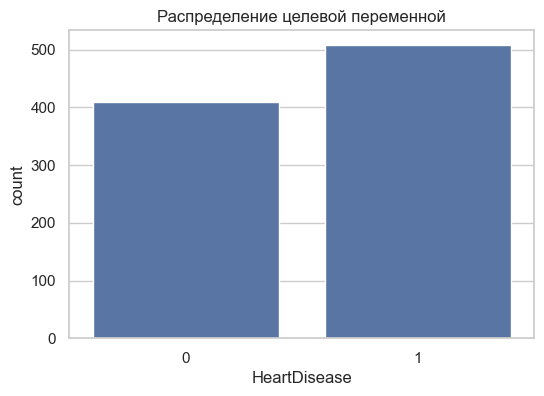

In [6]:
### Распределение целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x="HeartDisease", data=data)
plt.title("Распределение целевой переменной")
plt.show()

In [8]:
### Распределение возраста
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"], kde=True, bins=30)
plt.title("Распределение возраста")
plt.show()

In [33]:
### Boxplot для показателей кровяного давления по целевой переменной
plt.figure(figsize=(10, 6))
sns.violinplot(y="RestingBP", data=data, hue="HeartDisease")
plt.title("Кровяное давление в покое по классам заболеваемости")
plt.show()

In [34]:
### Boxplot для показателей кровяного давления по целевой переменной
plt.figure(figsize=(10, 6))
sns.violinplot(y="MaxHR", data=data, hue="HeartDisease")
plt.title("MaxHR по классам заболеваемости")
plt.show()

In [36]:
# Гистограммы для всех числовых переменных
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

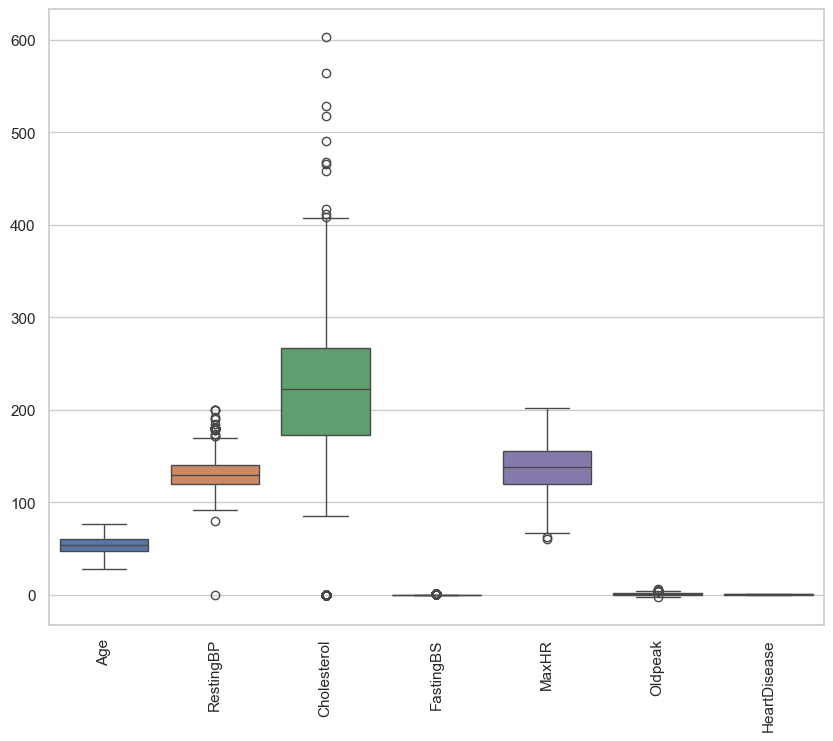

In [38]:
# Ящики с усами для визуализации аномалий
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

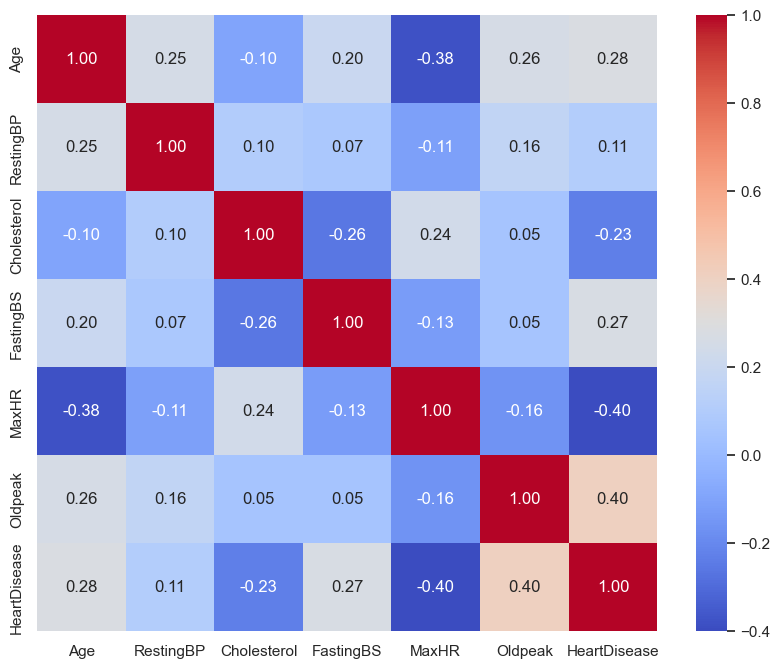

In [39]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes("number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Sex
M    725
F    193
Name: count, dtype: int64


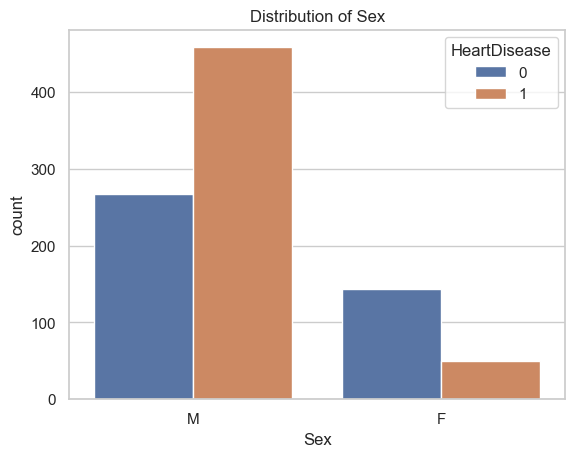

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


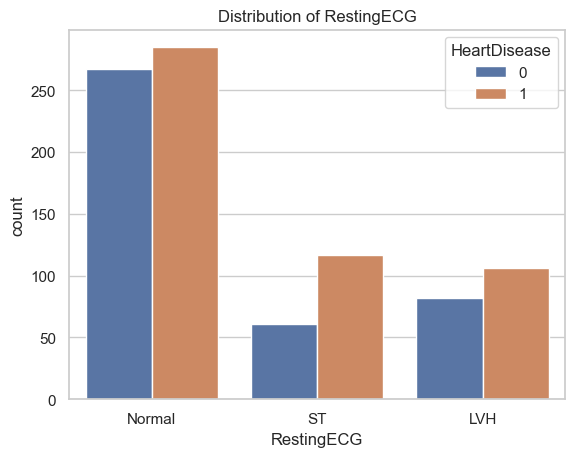

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [40]:
# Подсчет частот для категориальных переменных
categorical_vars = ["Sex", "RestingECG", "ExerciseAngina", "ST_Slope", "ChestPainType"]
for var in categorical_vars:
    print(data[var].value_counts())
    sns.countplot(x=var, data=data, hue="HeartDisease")
    plt.title(f"Distribution of {var}")
    plt.show()

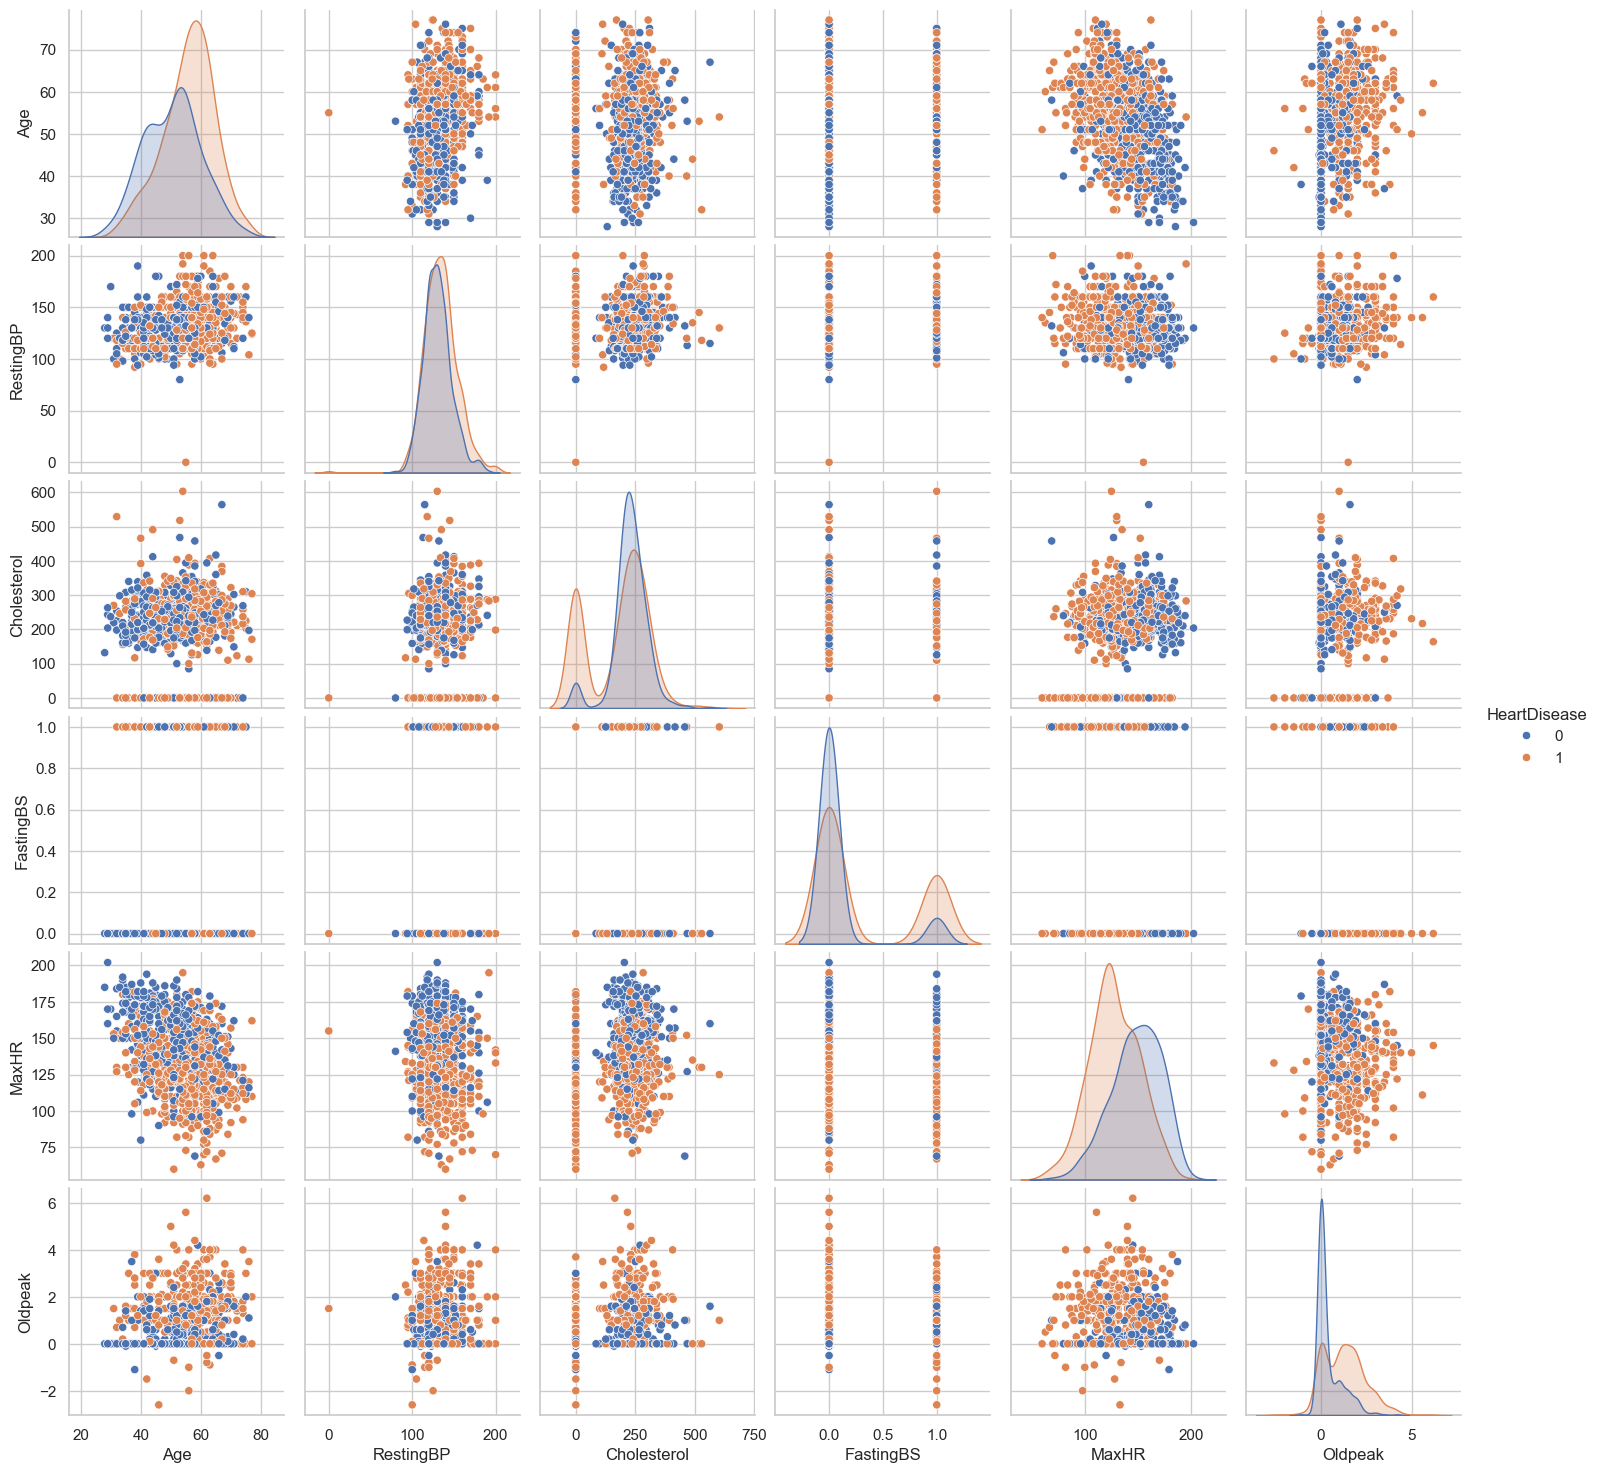

In [20]:
# Парные взаимодействия
sns.pairplot(data, hue="HeartDisease")
plt.show()